In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.model_selection import train_test_split
import math
# 本代码是一个最简单的线形回归问题，优化函数为minibatch SGD

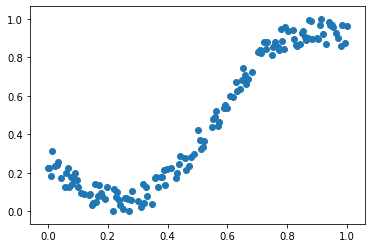

In [2]:
#产生数据集
n_dots = 200

x = np.linspace(0, 1, n_dots)
y = np.sin(2*x)*((x*x-1)**3 + 0.5)+ 0.1*np.random.rand(n_dots);

# 数据归一化
x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)

for i in range(0,len(x)):
    x[i] = (x[i] - x_min)/(x_max - x_min)
    y[i] = (y[i] - y_min)/(y_max - y_min)

#划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

plt.scatter(x_train,y_train)

In [3]:
#函数模型，线性模型y=a*x+b
#函数对a求导
def dfa(y,y_p,x):
    return (y-y_p)*(-x)
#函数对b求导
def dfb(y,y_p):
    return (y-y_p)*(-1)
#计算损失
def calc_loss(y,y_p):
    tmp = y_p-y
    tmp = tmp ** 2  
    SSE = sum(tmp) / (2 * len(y))
    return SSE

In [4]:
#打乱数据集
def shuffle_data(x,y):
    # 随机打乱x，y的数据，并且保持x和y一一对应
    seed = random.random()
    random.seed(seed)
    random.shuffle(x)
    random.seed(seed)
    random.shuffle(y)
#获得批量数据
def get_batch_data(x,y,batch=3):
    shuffle_data(x,y)
    x_new = x[0:batch]
    y_new = y[0:batch]
    return [x_new,y_new]

In [5]:
#绘制loss曲面图
def draw_hill(x,y):
    a = np.linspace(-20,20,100)
    b = np.linspace(-20,20,100)
    x = np.array(x)
    y = np.array(y)
    allSSE = np.zeros(shape=(len(a),len(b)))
    for ai in range(0,len(a)):
        for bi in range(0,len(b)):
            a0 = a[ai]
            b0 = b[bi]
            y_p = a0*x+b0
            SSE = calc_loss(y,y_p)
            allSSE[ai][bi] = SSE

    a,b = np.meshgrid(a, b)

    return [a,b,allSSE]

[ha,hb,hallSSE] = draw_hill(x,y)
hallSSE = hallSSE.T# 重要，将所有的losses做一个转置。原因是矩阵是以左上角至右下角顺序排列元素，而绘图是以左下角为原点。

step: 100 loss: 0.2501937146126918


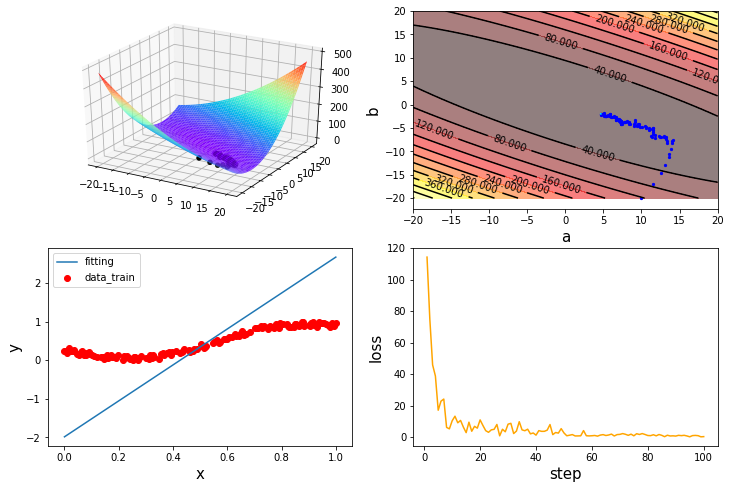

step: 10000 loss: 0.005496853835983235


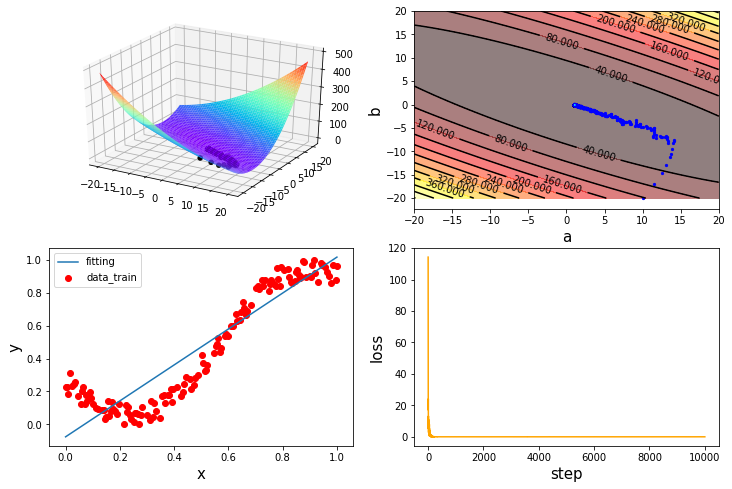

In [7]:
# 初始化a,b值
a = 10.0
b = -20.0
#开始训练

rate = 0.2 # learning rate

all_loss = []
all_step = []
all_a = []
all_b = []
last_a = a
last_b = b
for step in range(1,10001):
    loss = 0
    all_dfa = 0
    all_dfb = 0
    #选批量数据
    shuffle_data(x_train,y_train)
    [x_new,y_new] = get_batch_data(x_train,y_train,batch=4)
    #计算loss
    for i in range(0,len(x_new)):
        y_p = a*x_new[i] + b
        loss = loss + (y_new[i] - y_p)*(y_new[i] - y_p)/2
        all_dfa = all_dfa + dfa(y_new[i],y_p,x_new[i])
        all_dfb = all_dfb + dfb(y_new[i],y_p)
        
    all_dfa = all_dfa/len(x_new)
    all_dfb = all_dfb/len(x_new)
    loss = loss/len(x_new)
    
    all_loss.append(loss)
    all_step.append(step)
    all_a.append(a)
    all_b.append(b)
    #绘制图像
    if step == 100 or step == 10000:
        fig = plt.figure(1, figsize=(12, 8))
        # 绘制三维曲面
        ax = fig.add_subplot(2,2, 1, projection='3d')
        ax.plot_surface(ha, hb, hallSSE, rstride=2, cstride=2, cmap='rainbow')
        ax.scatter(all_a, all_b, all_loss, color='black')

        # 绘制等高线
        plt.subplot(2,2,2)
        plt.contourf(ha,hb,hallSSE,15,alpha=0.5,cmap=plt.cm.hot)
        C = plt.contour(ha,hb,hallSSE,15,colors='black')
        plt.scatter(all_a,all_b,s=5,color='blue')
        plt.plot([last_a,a],[last_b,b],color='aqua')
        plt.clabel(C,inline=True)
        plt.xlabel('a',fontsize=15)
        plt.ylabel('b',fontsize=15)

        # 绘制回归直线
        plt.subplot(2, 2, 3)
        plt.scatter(x_train, y_train,c="red",label = "data_train")
        x_ = np.linspace(0, 1, 2)
        y_draw = a * x_ + b
        plt.plot(x_, y_draw,label = "fitting")
        plt.legend()
        plt.xlabel("x",fontsize=15)
        plt.ylabel("y",fontsize=15)

        # 绘制loss更新曲线
        plt.subplot(2,2,4)
        plt.plot(all_step,all_loss,color='orange')
        plt.xlabel("step",fontsize=15)
        plt.ylabel("loss",fontsize=15)
     
        print("step:",step,"loss:",loss)
        plt.show()
        plt.pause(0.01)
        
    #更新a、b值
    last_a = a
    last_b = b
    a = a - rate * all_dfa
    b = b - rate * all_dfb

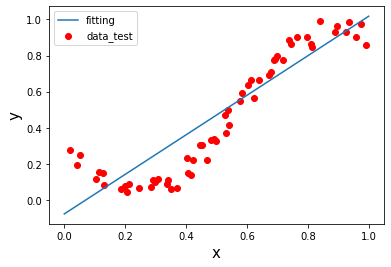

In [10]:
#使用训练模型对测试集进行预测
# 绘制测试集数据与预测模型直线
plt.scatter(x_test, y_test,c="red",label = "data_test")
x_ = np.linspace(0, 1, 2)
y_draw = last_a * x_ + last_b
plt.plot(x_, y_draw,label = "fitting")
plt.legend()
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.show()

In [11]:
#计算测试集下loss
y_test_pred = last_a * x_test +last_b
test_loss = calc_loss(y_test,y_test_pred)
print("训练集loss为：",test_loss)

训练集loss为： 0.008925131396334067
